In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
!pwd


/content


In [4]:
cd '/content/drive/MyDrive/kato_accidents/accidents/car_accidents'

/content/drive/MyDrive/kato_accidents/accidents/car_accidents


In [5]:
df=pd.read_csv('dane.csv')
df

,Data zdarzenia,Godzina,GPS x,GPS y,Miejscowość,Ulica,Numer domu,Numer drogi,KM HM (Pikietaż),Obszar,Skrzyżowanie,Geometria drogi,Charakterystyka miejsca zdarzenia,Oświetlenie,Warunki atmosferyczne,Rodzaj zdarzenia,Wina,Rodzaj drogi,Nawierzchnia drogi,Stan nawierzchni,Sygnalizacja świetlna,Oznakowanie poziome,Liczba pasów w zdarzeniu,Zachowanie kierującego,Zachowanie pieszego,Inne przyczyny,Liczba rannych w zdarzeniu,Liczba zabitych w zdarzeniu,Liczba kolizji,Liczba wypadków
0,2016-01-01,05:15:00,18*38'089,50*22'110,GLIWICE,TOSZECKA,NaN,901,"61,6",Obszar niezabudowany,NaN,Odcinek prosty,Jezdnia,Noc - droga nieoświetlona,Dobre warunki atmosferyczne,Najechanie na zwierzę,z innych przyczyn,Jednojezdniowa dwukierunkowa,Twarda,Sucha,Brak,Jest,2.0,NaN,NaN,"Obiekty, zwierzęta na drodze",0,0,1,0
1,2016-01-01,00:05:00,19*10'510,50*19'231,DĄBROWA GÓRNICZA,SIENKIEWICZA,NaN,G200 030S,NaN,Obszar zabudowany,Z drogą z pierwsz.,NaN,Jezdnia,Noc - droga oświetlona,Dobre warunki atmosferyczne,Najechanie na pojazd unieruchomiony,z winy kierującego,Jednojezdniowa dwukierunkowa,Twarda,Sucha,Brak,Jest,NaN,Nieprawidłowe: cofanie,NaN,NaN,0,0,1,0
2,2016-01-01,18:30:00,18*52'395,50*26'423,TARNOWSKIE GÓRY,KS.IGNACEGO SIWCA,4A,GMINNA,NaN,Obszar zabudowany,NaN,"Zakręt, łuk",Jezdnia,Noc - droga oświetlona,Dobre warunki atmosferyczne,Najechanie na pojazd unieruchomiony,z winy kierującego,Jednojezdniowa dwukierunkowa,Twarda,Sucha,Brak,Nie ma,2.0,Nieprawidłowe: omijanie,NaN,NaN,0,0,1,0
3,2016-01-01,15:10:00,18*51'381,50*26'408,TARNOWSKIE GÓRY,JÓZEFA PIŁSUDSKIEGO,6,P3276S,NaN,Obszar zabudowany,NaN,Odcinek prosty,Jezdnia,Światło dzienne,Pochmurno,Zderzenie pojazdów tylne,z winy kierującego,Jednojezdniowa dwukierunkowa,Twarda,Sucha,Brak,Jest,2.0,Nieprawidłowe: omijanie,NaN,NaN,0,0,1,0
4,2016-01-01,17:45:00,19*02'512,50*28'005,OŻAROWICE,DWORCOWA,16,P3203S,NaN,Obszar zabudowany,NaN,Odcinek prosty,Jezdnia,"Zmrok, świt",Dobre warunki atmosferyczne,Najechanie na zwierzę,z innych przyczyn,Jednojezdniowa dwukierunkowa,Twarda,Sucha,Brak,Nie ma,2.0,NaN,NaN,"Obiekty, zwierzęta na drodze",0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
229924,2019-12-10,10:30:00,19*11'161,50*18'119,SOSNOWIEC,BRACI MIEROSZEWSKICH,NaN,P7605S,NaN,Obszar zabudowany,NaN,Odcinek prosty,Jezdnia,Światło dzienne,Dobre warunki atmosferyczne,Zderzenie pojazdów boczne,z winy kierującego,Dwie jezdnie jednokierunkowe,Twarda,Sucha,Brak,Jest,4.0,Nieprawidłowe zmienianie pasa ruchu,NaN,NaN,0,0,1,0
229925,2019-11-20,02:00:00,19*06'395,49*55'329,DANKOWICE,OŚWIĘCIMSKA,NaN,P4444S,NaN,Obszar zabudowany,O ruchu okrężnym,NaN,Jezdnia,Noc - droga oświetlona,Dobre warunki atmosferyczne,"Najechanie na dziurę, wybój, garb",z winy kierującego,Jednojezdniowa dwukierunkowa,Twarda,Sucha,Brak,Jest,1.0,Nieprzestrzeganie znaków i innych sygnałów,NaN,NaN,1,0,0,1
229926,2019-11-24,14:30:00,19*10'522,50*17'251,SOSNOWIEC,BRACI MIEROSZEWSKICH,NaN,P7605S,NaN,Obszar zabudowany,Z drogą z pierwsz.,NaN,Jezdnia,Światło dzienne,Dobre warunki atmosferyczne,Zderzenie pojazdów boczne,z winy kierującego,Dwie jezdnie jednokierunkowe,Twarda,Sucha,"Jest, działa",Jest,2.0,Nieprawidłowe wyprzedzanie,NaN,NaN,0,0,1,0
229927,2019-12-04,10:50:00,18*45'563,49*53'158,ZABŁOCIE,SKRAJNA,5,G611078S,NaN,Obszar zabudowany,NaN,Odcinek prosty,Przejazd kolejowy strzeżony,Światło dzienne,Dobre warunki atmosferyczne,Najechanie na zapore kolejową,z innych przyczyn,Jednojezdniowa dwukierunkowa,Twarda,Sucha,"Jest, działa",Nie ma,2.0,NaN,NaN,Nieustalone,0,0,1,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 229929 entries, 0 to 229928
Data columns (total 30 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Data zdarzenia                     229929 non-null  object 
 1   Godzina                            229929 non-null  object 
 2   GPS x                              229929 non-null  object 
 3   GPS y                              229929 non-null  object 
 4   Miejscowość                        229929 non-null  object 
 5   Ulica                              209201 non-null  object 
 6   Numer domu                         136045 non-null  object 
 7   Numer drogi                        229929 non-null  object 
 8   KM HM (Pikietaż)                   35041 non-null   object 
 9   Obszar                             229928 non-null  object 
 10  Skrzyżowanie                       63150 non-null   object 
 11  Geometria drogi                    1639

In [7]:
df['full_data']=df['Data zdarzenia'] + ' ' + df['Godzina']

In [33]:
df['rok'] = pd.DatetimeIndex(df['full_data']).year
df['miesiac'] = pd.DatetimeIndex(df['full_data']).month
df['godzina'] = pd.DatetimeIndex(df['full_data']).hour
df['minuta'] = pd.DatetimeIndex(df['full_data']).minute
df['pelna_data'] = pd.DatetimeIndex(df['full_data']).date
df['dzien_tygodnia'] = pd.DatetimeIndex(df['full_data']).dayofweek
df['czy_weekend'] = df['dzien_tygodnia'].apply(lambda x: 1 if (x == 6 or x == 5 ) else 0 )

In [31]:
df.groupby('rok')['Liczba wypadków', 'Liczba kolizji'].agg(sum)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,Liczba wypadków,Liczba kolizji
rok,,
2016,3678,49571
2017,3519,54152
2018,3237,54578
2019,2964,58204


In [38]:
df.groupby('dzien_tygodnia')['Liczba wypadków', 'Liczba kolizji'].agg(sum)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,Liczba wypadków,Liczba kolizji
dzien_tygodnia,,
0,2108,34107
1,1947,33945
2,1913,33990
3,2030,34195
4,2201,36984
5,1734,25524
6,1465,17760


In [39]:
df.groupby('czy_weekend')['Liczba wypadków', 'Liczba kolizji'].agg(sum)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,Liczba wypadków,Liczba kolizji
czy_weekend,,
0,10199,173221
1,3199,43284


In [43]:
df.groupby('miesiac')['Liczba wypadków', 'Liczba kolizji'].agg(sum)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,Liczba wypadków,Liczba kolizji
miesiac,,
1,888,17443
2,763,15769
3,920,17123
4,1097,17591
5,1161,17909
6,1274,17319
7,1248,16967
8,1240,16929
9,1287,19140


In [44]:
df.groupby('godzina')['Liczba wypadków', 'Liczba kolizji'].agg(sum)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,Liczba wypadków,Liczba kolizji
godzina,,
0,100,1830
1,85,1300
2,73,1029
3,61,992
4,91,1278
5,357,3904
6,573,6227
7,574,10247
8,549,11376


In [50]:
df.groupby('Miejscowość')['Liczba wypadków', 'Liczba kolizji'].agg(sum).sort_values(by='Liczba wypadków',ascending=False)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,Liczba wypadków,Liczba kolizji
Miejscowość,,
CZĘSTOCHOWA,1450,16382
KATOWICE,1071,25830
SOSNOWIEC,696,10621
ZABRZE,618,6599
RUDA ŚLĄSKA,440,5300
...,...,...
KOPIENICA,0,5
SOŚNICA,0,2
KORNICE,0,41


In [42]:
df.groupby('Geometria drogi')['Liczba wypadków', 'Liczba kolizji'].agg(sum)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,Liczba wypadków,Liczba kolizji
Geometria drogi,,
Odcinek prosty,7121,135561
Odcinek prosty; Spadek,34,396
Odcinek prosty; Wierzchołek wzn.,1,15
Odcinek prosty; Wzniesienie,29,300
"Odcinek prosty; Zakręt, łuk",0,1
Spadek,101,1765
Wierzchołek wzn.,2,48
Wzniesienie,77,1240
"Zakręt, łuk",1100,15814


In [51]:
df['obszar_zabudowany'] = df['Obszar'].apply(lambda x: 1 if x == 'Obszar zabudowany' else (0 if x == 'Obszar niezabudowany' else None) )

In [52]:
df.groupby('Obszar')['Liczba wypadków', 'Liczba kolizji'].agg(sum)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,Liczba wypadków,Liczba kolizji
Obszar,,
Obszar niezabudowany,2604,42590
Obszar zabudowany,10794,173914


In [53]:
df.groupby('Charakterystyka miejsca zdarzenia')['Liczba wypadków', 'Liczba kolizji'].agg(sum)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,Liczba wypadków,Liczba kolizji
Charakterystyka miejsca zdarzenia,,
"Chodnik, droga dla pieszych",301,2311
Droga dla rowerzystów,9,10
"Droga, pas ruchu, śluza dla rowerów",81,186
"Droga, pas ruchu, śluza dla rowerów (od 11.2015)",1,4
Jezdnia,10017,181149
"Most, wiadukt, łącznica, tunel",55,1740
"Parking, plac",3,476
"Parking, plac, MOP",85,17900
"Parking, plac, MOP (od 11.2015)",6,1085


In [54]:
df.groupby('Rodzaj drogi')['Liczba wypadków', 'Liczba kolizji'].agg(sum)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,Liczba wypadków,Liczba kolizji
Rodzaj drogi,,
Autostrada,180,6568
Dwie jezdnie jednokierunkowe,2191,35499
Ekspresowa,187,3762
Jednojezdniowa dwukierunkowa,10138,150568
Jednokierunkowa,702,20107


In [55]:
df.groupby('Sygnalizacja świetlna')['Liczba wypadków', 'Liczba kolizji'].agg(sum)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,Liczba wypadków,Liczba kolizji
Sygnalizacja świetlna,,
Brak,12088,195515
"Jest, działa",1221,19838
"Jest, nie działa",89,1152


In [60]:
df.groupby('Zachowanie kierującego')['Liczba wypadków', 'Liczba kolizji'].agg(sum).sort_values(by='Liczba wypadków',ascending=False)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,Liczba wypadków,Liczba kolizji
Zachowanie kierującego,,
Nieustąpienie pierwszeństwa przejazdu,3041,31308
Niedostosowanie prędkości do warunków ruchu,1926,21227
Nieustąpienie pierwszeństwa pieszemu na przejściu dla pieszych,1389,917
Niezachowanie bezp. odleg. między pojazdami,1198,41495
Inne przyczyny,582,8484
...,...,...
Nieprawidłowe omijanie; Nieprawidłowe zmienianie pasa ruchu,0,2
"Nieprawidłowe omijanie; Nieprawidłowe zatrzymywanie, postój",0,9
Nieprawidłowe omijanie; Nieprawidłowe wyprzedzanie,0,2


convert coordinates to decimals

In [56]:
import re

def dms2dd(coord):
    """ GPS HH.MM.SS.S to DD (Decimal Degrees) conversion """
    c = re.findall(r"\w+", coord)
    degrees = float(c[0])
    minutes = float(c[1])
    if len(c) > 2:
        seconds = float(c[2])/10   
    else:
        seconds = 0
    dd = (float(degrees) + (minutes)/60 + float(seconds)/(60*60))
    return dd

df['lon'] = df['GPS x'].apply(lambda x : dms2dd(x))
df['lat'] = df['GPS y'].apply(lambda x : dms2dd(x))

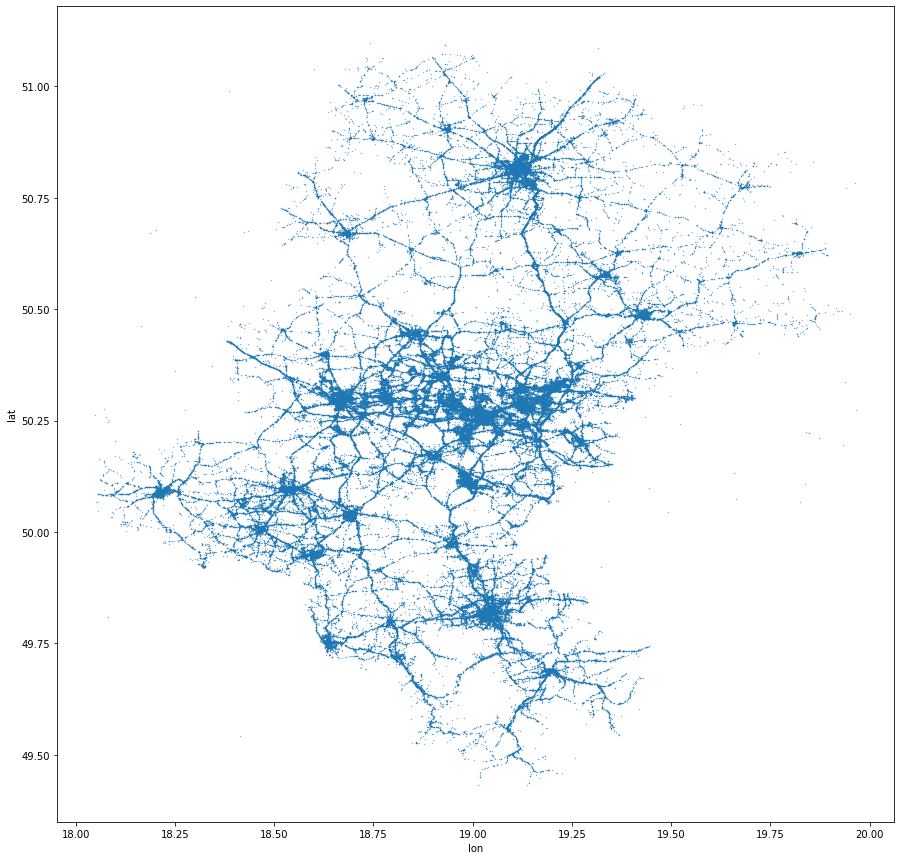

In [57]:
df.drop(df[df['lat'] < 49.393889].index, inplace=True)
df.drop(df[df['lat'] > 51.099167].index, inplace=True)
df.drop(df[df['lon'] < 18.035].index, inplace=True)
df.drop(df[df['lon'] > 19.973889].index, inplace=True)

fig, ax = plt.subplots(figsize = (15, 15))
df.plot(kind='scatter', x='lon', y='lat', alpha=0.8, s=0.1, ax = ax)
plt.show()